<a href="https://colab.research.google.com/github/karna-charan/-Neural-Networks-and-Deep-Learning-/blob/main/handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset (handwritten digits 0–9)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values from 0–255 to 0–1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build the neural network model
model = models.Sequential([

    # Flatten 28x28 image into 1D vector (784)
    layers.Flatten(input_shape=(28, 28)),

    # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(128, activation='relu'),

    # Output layer with 10 neurons (digits 0–9)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(X_train, y_train, epochs=5, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", test_accuracy)

# Predict digit for first test image
prediction = model.predict(X_test[:1])
predicted_digit = prediction.argmax()

print("Predicted Digit:", predicted_digit)
print("Actual Digit:", y_test[0])


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8743 - loss: 0.4496 - val_accuracy: 0.9653 - val_loss: 0.1202
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9647 - loss: 0.1229 - val_accuracy: 0.9735 - val_loss: 0.0908
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9748 - loss: 0.0834 - val_accuracy: 0.9777 - val_loss: 0.0808
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9810 - loss: 0.0626 - val_accuracy: 0.9778 - val_loss: 0.0856
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9856 - loss: 0.0458 - val_accuracy: 0.9763 - val_loss: 0.0860
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9686 - loss: 0.1020
Test Accuracy: 0.9725000262260437
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Digit: 7
Actual Digit: 7


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 43s 50ms/step - accuracy: 0.8877 - loss: 0.3805 - val_accuracy: 0.9833 - val_loss: 0.0582
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9829 - loss: 0.0576 - val_accuracy: 0.9883 - val_loss: 0.0417
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 42s 49ms/step - accuracy: 0.9898 - loss: 0.0346 - val_accuracy: 0.9880 - val_loss: 0.0367
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 46s 54ms/step - accuracy: 0.9920 - loss: 0.0243 - val_accuracy: 0.9910 - val_loss: 0.0323
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.9943 - loss: 0.0158 - val_accuracy: 0.9913 - val_loss: 0.0346
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9875 - loss: 0.0380
Test accuracy: 0.9902999997138977
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


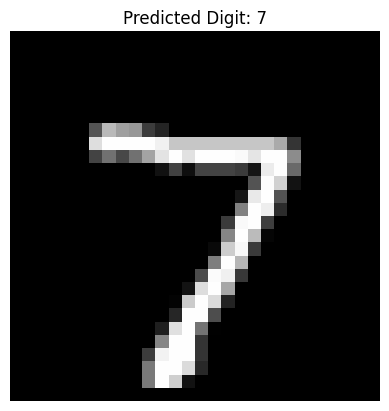

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Install packages (if not already installed)
!pip install tensorflow matplotlib

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Add channel dimension (required for CNN)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digits (0–9)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

import numpy as np

# Pick a random test image
index = 0
image = x_test[index]

prediction = model.predict(image[np.newaxis, ...])
predicted_digit = np.argmax(prediction)

plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 92s 107ms/step - left_digit_accuracy: 0.8652 - left_digit_loss: 0.4338 - loss: 0.8655 - right_digit_accuracy: 0.8618 - right_digit_loss: 0.4317 - val_left_digit_accuracy: 0.9778 - val_left_digit_loss: 0.0716 - val_loss: 0.1315 - val_right_digit_accuracy: 0.9828 - val_right_digit_loss: 0.0597
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 102ms/step - left_digit_accuracy: 0.9826 - left_digit_loss: 0.0606 - loss: 0.1140 - right_digit_accuracy: 0.9827 - right_digit_loss: 0.0533 - val_left_digit_accuracy: 0.9820 - val_left_digit_loss: 0.0617 - val_loss: 0.1267 - val_right_digit_accuracy: 0.9808 - val_right_digit_loss: 0.0647
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 86s 102ms/step - left_digit_accuracy: 0.9884 - left_digit_loss: 0.0376 - loss: 0.0688 - right_digit_accuracy: 0.9895 - right_digit_loss: 0.0312 - val_left_digit_accuracy: 0.9858 - val_left_digit_loss: 0.0458 - val_loss: 0.0834 - val_right_digit_accuracy: 0.9885 - val_right_digit_loss: 0.0374
Epoc

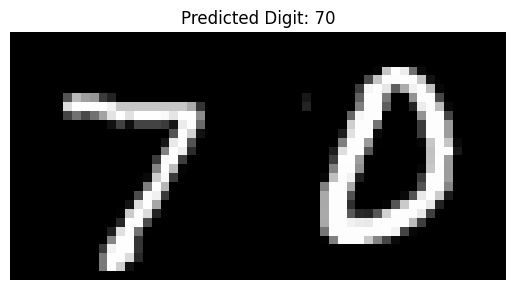

In [4]:
# =========================
# Imports
# =========================
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# =========================
# Load MNIST dataset
# =========================
# x_train, x_test: images (28x28 grayscale)
# y_train, y_test: digit labels (0–9)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# =========================
# Create double-digit images
# =========================
def create_double_digit(images, labels):
    """
    Creates images with two digits side-by-side.
    Returns:
        X  -> combined images (28x56x1)
        y1 -> left digit labels
        y2 -> right digit labels
    """
    X, y1, y2 = [], [], []

    for i in range(len(images)):
        # Randomly choose a second image
        j = np.random.randint(0, len(images))

        # Concatenate images horizontally (left + right)
        img = np.concatenate([images[i], images[j]], axis=1)
        X.append(img)

        # Store labels for each digit
        y1.append(labels[i])
        y2.append(labels[j])

    # Convert to NumPy array and add channel dimension
    X = np.array(X)[..., np.newaxis]

    return X, np.array(y1), np.array(y2)

# Generate training and testing data
X_train, y_left_train, y_right_train = create_double_digit(x_train, y_train)
X_test, y_left_test, y_right_test = create_double_digit(x_test, y_test)

# =========================
# Build the CNN model
# =========================
inputs = layers.Input(shape=(28, 56, 1))  # Two MNIST digits side by side

# First convolution block
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.MaxPooling2D()(x)

# Second convolution block
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)

# Fully connected layers
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)

# Output heads (multi-output model)
left = layers.Dense(10, activation='softmax', name='left_digit')(x)
right = layers.Dense(10, activation='softmax', name='right_digit')(x)

# Define the model
model = models.Model(inputs, [left, right])

# =========================
# Compile the model
# =========================
model.compile(
    optimizer='adam',
    loss={
        'left_digit': 'sparse_categorical_crossentropy',
        'right_digit': 'sparse_categorical_crossentropy'
    },
    metrics={
        'left_digit': 'accuracy',
        'right_digit': 'accuracy'
    }
)

# =========================
# Train the model
# =========================
model.fit(
    X_train,
    {
        'left_digit': y_left_train,
        'right_digit': y_right_train
    },
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

# =========================
# Test on one image
# =========================
idx = 0  # Change index to test different samples
image = X_test[idx:idx+1]

# Predict both digits
pred_left, pred_right = model.predict(image)

# Convert probabilities to digit predictions
d1 = np.argmax(pred_left)
d2 = np.argmax(pred_right)

# Combine digits into a two-digit number
predicted_digit = d1 * 10 + d2

# =========================
# Display result
# =========================
plt.imshow(image[0].squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()